# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostorphe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [4]:
df.columns = [col_formatting(col) for col in df.columns]

In [5]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [7]:
#Defining the problem
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [8]:
train, test = train_test_split(df)

In [9]:
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
6585,-0.552131,20.9860,-0.230945,-1.352353,-1.082024,-1.169744,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
345,-0.161134,39.9900,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9150,0.745978,121.9878,0.020405,0.738870,0.576116,0.439724,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10814,-0.504008,32.9278,-0.370585,0.564601,0.368848,0.761617,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3754,-0.457089,19.1520,-0.091306,-0.306741,0.576116,0.922564,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
9895,-0.443855,24.8429,-0.426440,1.087407,0.990651,1.244458,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1266,0.456039,109.7878,-0.426440,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7958,0.462054,219.5878,0.523106,0.564601,-0.252954,-0.686904,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8829,-0.153916,77.8700,-0.063378,-0.655279,-2.118362,-1.491638,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9139,-0.599051,6.0878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
#Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     536.2
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:51:03   Log-Likelihood:                -40476.
No. Observations:                8152   AIC:                         8.114e+04
Df Residuals:                    8057   BIC:                         8.181e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.9404      1.780     35.930      0.000      60.452      67.429
piece_count                                         75.0125      0.871     86.083      0.000      73.304      76.721
num_reviews                                          6.9406      0.667     10.412      0.000       5.634       8.247
play_star_rating                                     5.3330      0.621      8.594      0.000       4.117       6.549
star_rating                                         -1.2523      0.710     -1.763      0.078      -2.645       0.140
val_star_rating                                     -8.4724      0.634    -13.363      0.000      -9.715      -7.230
ages_10plus                                        130.0074      6.524     19.926      0.000     117.218     142.797
ages_10_14                                         -22.5837      8.849     -2.552      0.011     -39.930      -5.237
ages_10_16                                         -11.2440      3.980     -2.825      0.005     -19.046      -3.442
ages_10_21                                          49.7139      7.316      6.795      0.000      35.373      64.055
ages_11_16                                         -16.7636      5.637     -2.974      0.003     -27.813      -5.714
ages_12plus                                         69.2748      5.455     12.698      0.000      58.581      79.969
ages_12_16                                         -57.2636      7.053     -8.119      0.000     -71.089     -43.438
ages_14plus                                         20.8114      4.006      5.196      0.000      12.959      28.663
ages_16plus                                         29.9692      5.881      5.096      0.000      18.440      41.498
ages_1half_3                                        -8.6260      2.363     -3.650      0.000     -13.259      -3.993
ages_1half_5                                        -4.6903      3.013     -1.557      0.120     -10.597       1.216
ages_2_5                                            15.3584      1.674      9.173      0.000      12.076      18.641
ages_4plus                                         -20.7126      6.261     -3.308      0.001     -32.986      -8.439
ages_4_7                                            -6.0439      3.400     -1.777      0.076     -12.709       0.622
ages_4_99                                           -1.6339      3.566     -0.458      0.647      -8.625       5.357
ages_5plus                                          -9.0683      3.154     -2.875      0.004     -15.251      -2.886
ages_5_12                                          -35.4169      3.049    -11.617      0.000     -41.393     -29.441
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [12]:
#Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 70
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.9404,1.780,35.930,0.000,60.452,67.429
piece_count,75.0125,0.871,86.083,0.000,73.304,76.721
num_reviews,6.9406,0.667,10.412,0.000,5.634,8.247
play_star_rating,5.3330,0.621,8.594,0.000,4.117,6.549
star_rating,-1.2523,0.710,-1.763,0.078,-2.645,0.140


In [13]:
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     730.7
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:51:03   Log-Likelihood:                -40486.
No. Observations:                8152   AIC:                         8.111e+04
Df Residuals:                    8082   BIC:                         8.160e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.0350      1.589     40.295      0.000      60.920      67.150
piece_count                                         75.2010      0.853     88.196      0.000      73.530      76.872
num_reviews                                          6.9889      0.654     10.691      0.000       5.707       8.270
play_star_rating                                     4.8640      0.524      9.287      0.000       3.837       5.891
val_star_rating                                     -9.0442      0.494    -18.294      0.000     -10.013      -8.075
ages_10plus                                        128.1620      4.838     26.490      0.000     118.678     137.646
ages_10_14                                         -16.9282      9.228     -1.834      0.067     -35.018       1.161
ages_10_16                                          -5.8888      3.861     -1.525      0.127     -13.457       1.679
ages_10_21                                          45.5699      3.404     13.388      0.000      38.898      52.242
ages_11_16                                         -11.3873      5.479     -2.078      0.038     -22.128      -0.646
ages_12plus                                         71.5598      6.084     11.762      0.000      59.634      83.485
ages_12_16                                         -52.0889      7.429     -7.011      0.000     -66.652     -37.526
ages_14plus                                         25.1723      4.719      5.335      0.000      15.923      34.422
ages_16plus                                         33.3807      6.621      5.042      0.000      20.402      46.359
ages_1half_3                                        -1.8828      3.072     -0.613      0.540      -7.905       4.140
ages_2_5                                            21.5870      2.036     10.603      0.000      17.596      25.578
ages_4plus                                         -20.8686      9.541     -2.187      0.029     -39.572      -2.166
ages_5plus                                          -7.6223      3.122     -2.442      0.015     -13.741      -1.503
ages_5_12                                          -28.6875      2.715    -10.567      0.000     -34.009     -23.366
ages_6plus                                         -20.0211      5.767     -3.472      0.001     -31.326      -8.717
ages_6_12                                          -15.4608      1.962     -7.881      0.000     -19.306     -11.615
ages_6_14                                           -3.3046      3.985     -0.829      0.407     -11.115       4.506
ages_7_12                                          -14.5313      2.277     -6.381      0.000     -18.996     -10.067
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [14]:
#Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

71 60
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.0350,1.589,40.295,0.0,60.920,67.150
piece_count,75.2010,0.853,88.196,0.0,73.530,76.872
num_reviews,6.9889,0.654,10.691,0.0,5.707,8.270
play_star_rating,4.8640,0.524,9.287,0.0,3.837,5.891
val_star_rating,-9.0442,0.494,-18.294,0.0,-10.013,-8.075


In [15]:
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     853.6
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:51:03   Log-Likelihood:                -40494.
No. Observations:                8152   AIC:                         8.111e+04
Df Residuals:                    8092   BIC:                         8.153e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.1553      1.203     52.511      0.000      60.798      65.513
piece_count                                         74.8700      0.815     91.890      0.000      73.273      76.467
num_reviews                                          6.9779      0.652     10.707      0.000       5.700       8.255
play_star_rating                                     4.9404      0.517      9.551      0.000       3.926       5.954
val_star_rating                                     -9.0516      0.486    -18.609      0.000     -10.005      -8.098
ages_10plus                                        131.1368      4.656     28.163      0.000     122.009     140.264
ages_10_21                                          47.1610      3.282     14.371      0.000      40.728      53.594
ages_11_16                                          -7.9505      5.214     -1.525      0.127     -18.171       2.271
ages_12plus                                         75.8868      5.724     13.257      0.000      64.666      87.108
ages_12_16                                         -47.8539      7.136     -6.706      0.000     -61.841     -33.866
ages_14plus                                         30.1192      4.149      7.259      0.000      21.985      38.253
ages_16plus                                         39.1117      6.016      6.501      0.000      27.318      50.905
ages_2_5                                            23.2611      1.814     12.820      0.000      19.704      26.818
ages_4plus                                         -20.8281      9.541     -2.183      0.029     -39.531      -2.125
ages_5plus                                          -6.9497      3.089     -2.250      0.024     -13.004      -0.895
ages_5_12                                          -26.5080      2.501    -10.599      0.000     -31.411     -21.605
ages_6plus                                         -17.8771      5.675     -3.150      0.002     -29.002      -6.752
ages_6_12                                          -12.6756      1.555     -8.150      0.000     -15.724      -9.627
ages_7_12                                          -12.1061      1.957     -6.186      0.000     -15.942      -8.270
ages_7_14                                           -8.7636      1.689     -5.190      0.000     -12.074      -5.454
ages_8plus                                          14.9655      4.313      3.470      0.001       6.511      23.420
ages_8_12                                          -11.5277      2.522     -4.571      0.000     -16.472      -6.584
ages_8_14                                           -7.1925      1.651     -4.357      0.000     -10.428      -3.957
ages_9plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [16]:
#Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.3415554384664),
 ('num_reviews', 2.865042638589841),
 ('play_star_rating', 1.780953168866108),
 ('val_star_rating', 1.5872372982448872),
 ('ages_10plus', 7.0414603212331235),
 ('ages_10_21', 1.0522731989458165),
 ('ages_11_16', 1.1252304627951057),
 ('ages_12plus', 5.98602924809283),
 ('ages_12_16', 1.1603373685338425),
 ('ages_14plus', 2.0017790707786642),
 ('ages_16plus', 8.728374354137088),
 ('ages_2_5', 1.181425714296427),
 ('ages_4plus', 1.196309979977052),
 ('ages_5plus', inf),
 ('ages_5_12', 3.1783992313558813),
 ('ages_6plus', 2.6581710371389544),
 ('ages_6_12', 1.719753129808251),
 ('ages_7_12', 1.3928803353411439),
 ('ages_7_14', 1.7975941356075356),
 ('ages_8plus', 2.576252924249936),
 ('ages_8_12', 1.211981609682951),
 ('ages_8_14', 1.5847086107243185),
 ('ages_9plus', 1.4024994837404385),
 ('ages_9_12', 1.0161369376548448),
 ('theme_name_Architecture', 5.163097984480441),
 ('theme_name_BOOST', 1.0607703644631965),
 ('theme_name_Blues_Helicopter_Pursuit',

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [17]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

60 53


In [18]:
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     840.0
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:51:05   Log-Likelihood:                -40926.
No. Observations:                8152   AIC:                         8.196e+04
Df Residuals:                    8098   BIC:                         8.234e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.8441      1.075     60.332      0.000      62.737      66.951
piece_count                                         76.7379      0.680    112.903      0.000      75.406      78.070
num_reviews                                          5.5434      0.634      8.743      0.000       4.301       6.786
play_star_rating                                     5.8429      0.497     11.756      0.000       4.869       6.817
val_star_rating                                    -10.6849      0.492    -21.729      0.000     -11.649      -9.721
ages_10_21                                          45.4322      3.419     13.290      0.000      38.731      52.133
ages_11_16                                         -17.6469      5.287     -3.338      0.001     -28.010      -7.284
ages_12_16                                         -59.1052      7.268     -8.132      0.000     -73.352     -44.858
ages_14plus                                          9.5050      3.807      2.497      0.013       2.043      16.968
ages_2_5                                            22.1644      1.821     12.173      0.000      18.595      25.734
ages_4plus                                         -12.2200      9.990     -1.223      0.221     -31.803       7.363
ages_5_12                                          -28.4772      2.577    -11.049      0.000     -33.529     -23.425
ages_6plus                                         -20.7247      5.956     -3.480      0.001     -32.400      -9.049
ages_6_12                                          -15.8680      1.557    -10.191      0.000     -18.920     -12.816
ages_7_12                                          -14.0922      2.003     -7.037      0.000     -18.018     -10.167
ages_7_14                                          -11.1374      1.717     -6.487      0.000     -14.503      -7.772
ages_8plus                                           2.1358      4.434      0.482      0.630      -6.556      10.827
ages_8_12                                          -14.1759      2.577     -5.502      0.000     -19.227      -9.125
ages_8_14                                          -10.5463      1.692     -6.234      0.000     -13.863      -7.230
ages_9plus                                          25.0217     10.293      2.431      0.015       4.846      45.198
ages_9_12                                          -25.5232      6.164     -4.141      0.000     -37.606     -13.441
theme_name_BOOST                                    84.6260      9.772      8.660      0.000      65.470     103.782
theme_name_Blues_Helicopter_Pursuit                 22.4221      8.869      2.528      0.011       5.036      39.808
theme_name_Carnotaurus_Gyrosphere_Escape 

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

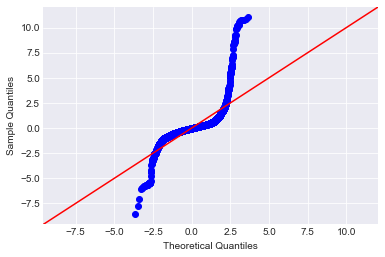

In [19]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violoate this principle and display heteroscedacsticity.

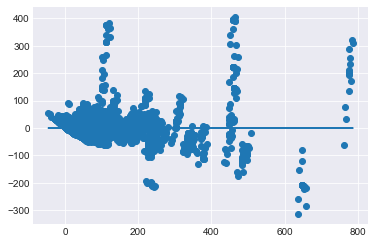

In [20]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

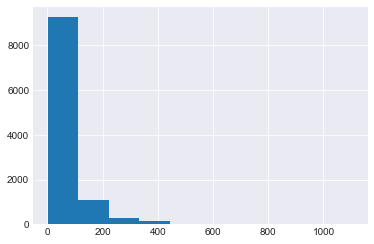

In [21]:
df.list_price.hist()

In [22]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


## Rerunning the Model

In [23]:
orig_tot = len(df)
df = df[df.list_price < 450] #Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) #Applying a log transformation
train, test = train_test_split(df)

#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     464.5
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:51:06   Log-Likelihood:                -4980.0
No. Observations:                8067   AIC:                         1.007e+04
Df Residuals:                    8013   BIC:                         1.045e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4048      0.013    254.915      0.000       3.379       3.431
piece_count                                          0.6185      0.010     62.314      0.000       0.599       0.638
num_reviews                                          0.0180      0.008      2.216      0.027       0.002       0.034
play_star_rating                                     0.0933      0.006     15.271      0.000       0.081       0.105
val_star_rating                                     -0.1447      0.006    -23.782      0.000      -0.157      -0.133
ages_10_21                                           0.6428      0.040     15.930      0.000       0.564       0.722
ages_11_16                                           0.1958      0.067      2.901      0.004       0.063       0.328
ages_12_16                                          -0.2090      0.084     -2.495      0.013      -0.373      -0.045
ages_14plus                                          0.0942      0.051      1.857      0.063      -0.005       0.194
ages_2_5                                             0.4863      0.022     21.779      0.000       0.443       0.530
ages_4plus                                          -1.4574      0.120    -12.157      0.000      -1.692      -1.222
ages_5_12                                           -0.7317      0.032    -22.720      0.000      -0.795      -0.669
ages_6plus                                          -0.9096      0.070    -12.994      0.000      -1.047      -0.772
ages_6_12                                           -0.1970      0.019    -10.280      0.000      -0.235      -0.159
ages_7_12                                            0.0688      0.024      2.860      0.004       0.022       0.116
ages_7_14                                           -0.0494      0.021     -2.341      0.019      -0.091      -0.008
ages_8plus                                           0.5605      0.054     10.370      0.000       0.455       0.666
ages_8_12                                            0.2025      0.031      6.587      0.000       0.142       0.263
ages_8_14                                            0.2195      0.021     10.495      0.000       0.179       0.260
ages_9plus                                           0.2767      0.137      2.014      0.044       0.007       0.546
ages_9_12                                            0.3860      0.084      4.621      0.000       0.222       0.550
theme_name_BOOST                                     0.9681      0.116      8.336      0.000       0.740       1.196
theme_name_Blues_Helicopter_Pursuit                  0.7122      0.115      6.206      0.000       0.487       0.937
theme_name_Carnotaurus_Gyrosphere_Escape 

## Check Normality Assumption

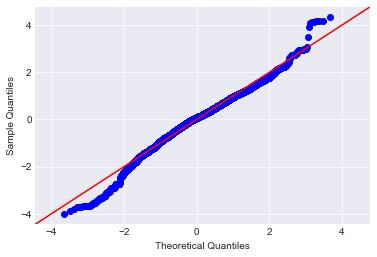

In [24]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

> **Comment:** Much, much better!

## Check Homoscedasticity Assumption

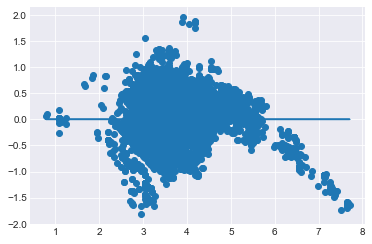

In [25]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

>**Comment:**There is still a clear underestimate now by the model as the log transformed list price increases, but the model is much improved. Further subsetting is potentially warranted.

## Rexamining the Transformed Distribution

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


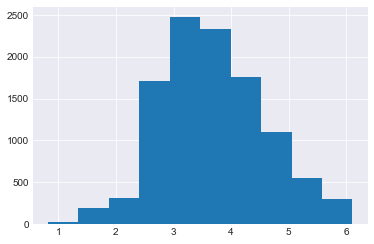

In [26]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [27]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     463.5
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:51:07   Log-Likelihood:                -4807.4
No. Observations:                8027   AIC:                             9723.
Df Residuals:                    7973   BIC:                         1.010e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4337      0.013    256.056      0.000       3.407       3.460
piece_count                                          0.6771      0.011     62.763      0.000       0.656       0.698
num_reviews                                          0.0196      0.008      2.420      0.016       0.004       0.036
play_star_rating                                     0.0941      0.006     15.872      0.000       0.082       0.106
val_star_rating                                     -0.1463      0.006    -24.884      0.000      -0.158      -0.135
ages_10_21                                           0.7506      0.040     18.768      0.000       0.672       0.829
ages_11_16                                           0.1078      0.069      1.571      0.116      -0.027       0.242
ages_12_16                                          -0.2899      0.090     -3.203      0.001      -0.467      -0.112
ages_14plus                                         -0.0018      0.052     -0.034      0.973      -0.105       0.101
ages_2_5                                             0.4966      0.022     22.573      0.000       0.453       0.540
ages_4plus                                          -1.4367      0.124    -11.578      0.000      -1.680      -1.193
ages_5_12                                           -0.7706      0.032    -24.136      0.000      -0.833      -0.708
ages_6plus                                          -0.9763      0.070    -13.936      0.000      -1.114      -0.839
ages_6_12                                           -0.2184      0.019    -11.571      0.000      -0.255      -0.181
ages_7_12                                            0.0386      0.024      1.601      0.109      -0.009       0.086
ages_7_14                                           -0.0637      0.021     -3.071      0.002      -0.104      -0.023
ages_8plus                                           0.5355      0.054      9.953      0.000       0.430       0.641
ages_8_12                                            0.1859      0.031      6.087      0.000       0.126       0.246
ages_8_14                                            0.1959      0.020      9.613      0.000       0.156       0.236
ages_9plus                                           0.2992      0.127      2.358      0.018       0.050       0.548
ages_9_12                                            0.3316      0.074      4.479      0.000       0.186       0.477
theme_name_BOOST                                     0.9680      0.111      8.727      0.000       0.751       1.185
theme_name_Blues_Helicopter_Pursuit                  0.7250      0.120      6.029      0.000       0.489       0.961
theme_name_Carnotaurus_Gyrosphere_Escape 

## Check Normality Assumption

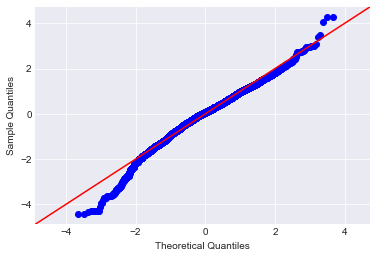

In [28]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

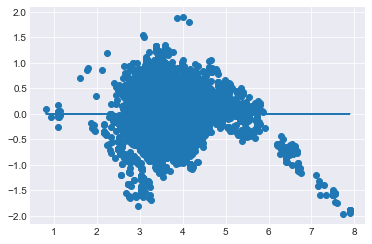

In [29]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** No improvement observed.

## An Alternative Approach: Building a Model From the Ground Up

In [30]:
x_cols = ['piece_count', 'country_US']

In [31]:
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     4385.
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:51:07   Log-Likelihood:                -7487.5
No. Observations:                8027   AIC:                         1.498e+04
Df Residuals:                    8024   BIC:                         1.500e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7375      0.007    524.469      0.000       3.724       3.752
piece_count     0.7910      0.009     92.789      0.000       0.774       0.808
country_US     -0.2849      0.027    -10.383      0.000      -0.339      -0.231
==============================================================================
Omnibus:                      506.731   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              820.321
Skew:                          -0.507   Prob(JB):                    7.41e-179
Kurtosis:                       4.194   Cond. No.                         4.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking Assumptions for Simplified Model

## Check Normality Assumption

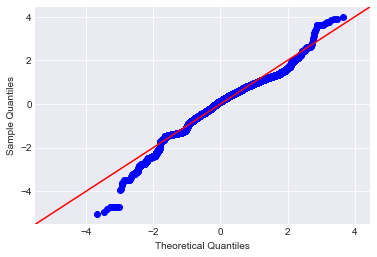

In [32]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

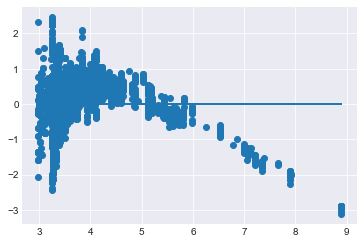

In [34]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** Certainly not as strong a model, but with only 2 features, over half the model performance was recovered. 

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 